In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1 - Data Cleaning and Preprocessing
# Step 1: Load the dataset from the CSV file
df_patients = pd.read_csv("Dataset.csv")

# Display the first few rows to inspect the data
print("First 5 rows of the dataset:")
print(df_patients.head())

# Check the shape (number of rows and columns)
print(f"Dataset Shape: {df_patients.shape}")

# Step 2: Identify and Handle Missing Values
# Check missing values before replacement
print("Missing values in each column (before replacement):")
print(df_patients.isnull().sum())

# Replace '?' with NaN so missing values are properly recognized
df_patients.replace('?', pd.NA, inplace=True)

# Verify missing values after replacement
print("Missing values in each column (after replacing '?'):")
print(df_patients.isnull().sum())

# Impute Missing Values Separately for Numeric and Categorical Columns
# For numeric columns: fill missing values with the mean.
numeric_cols = df_patients.select_dtypes(include=['float64', 'int64']).columns
df_patients[numeric_cols] = df_patients[numeric_cols].fillna(df_patients[numeric_cols].mean())

# For categorical columns: fill missing values with the mode (most frequent value).
for col in df_patients.select_dtypes(include=['object']).columns:
    df_patients[col] = df_patients[col].fillna(df_patients[col].mode()[0])


# Verify that missing values have been handled
print("Missing values after imputation:")
print(df_patients.isnull().sum())

# Step 3: Outlier Detection and Removal using IQR
# Select only numeric columns for outlier detection
numeric_cols = df_patients.select_dtypes(include=['float64', 'int64']).columns
print("Numeric columns for outlier detection:", numeric_cols)

# Calculate the first (Q1) and third (Q3) quartiles, and then the IQR
Q1 = df_patients[numeric_cols].quantile(0.25)
Q3 = df_patients[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Remove rows that have any outliers (using 1.5 * IQR rule)
df_patients = df_patients[~((df_patients[numeric_cols] < (Q1 - 1.5 * IQR)) | 
                            (df_patients[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check the new shape after outlier removal
print(f"Shape after removing outliers: {df_patients.shape}")

# Step 4: Normalize the Features
# We want to normalize numerical columns (e.g.Blood_Pressure, etc.)
# but we don't want to normalize columns that are identifiers or the target variable (e.g., ICU).
# We also don't want to normalise Age, only remove outliers

from sklearn.preprocessing import StandardScaler

# Get the list of numeric columns first
numeric_cols = df_patients.select_dtypes(include=['int64', 'float64']).columns.tolist()

# If there is an 'index' column or any identifier, remove it from the list
if 'index' in numeric_cols:
    numeric_cols.remove('index')

# Also, remove the target variable 'ICU' because we don't want to scale it.
if 'ICU' in numeric_cols:
    numeric_cols.remove('ICU')

# Remove Age as it does not need to be normalised
if 'AGE' in numeric_cols:
    numeric_cols.remove('AGE')

print("Numeric columns to normalize:", numeric_cols)

# Create a StandardScaler object
scaler = StandardScaler()

# Apply the scaler to the selected numeric columns
df_patients[numeric_cols] = scaler.fit_transform(df_patients[numeric_cols])

# Let's print a few rows to check that normalization worked
print("Data after normalization:")
print(df_patients.head())

# Final Check: Print the final shape of the dataset
print(f"Final dataset shape after normalization: {df_patients.shape}")

# Save the cleaned and normalized dataset to a CSV file for later use
df_patients.to_csv('cleaned_patients.csv', index=False)

# Step 5: Verify Data Types and Remove Irrelevant Columns
# Let's check the data types to make sure all columns have the expected types.

print("Data types before adjustment:")
print(df_patients.dtypes)

# If you have any columns that are irrelevant for your analysis, remove them.
# For example, if 'index' is just an identifier, we remove it.
columns_to_remove = ['index']  # Add any other irrelevant columns to this list if needed.
df_patients.drop(columns=columns_to_remove, inplace=True)
df_patients['ICU'] = pd.to_numeric(df_patients['ICU'], errors='coerce')

# Verify the data types and list of columns after removal
print("Data types after adjustment:")
print(df_patients.dtypes)
print("Remaining columns:")
print(df_patients.columns)

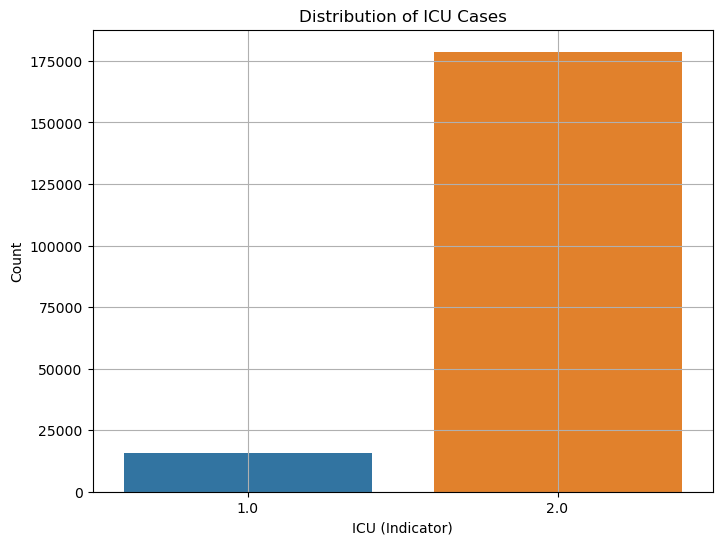

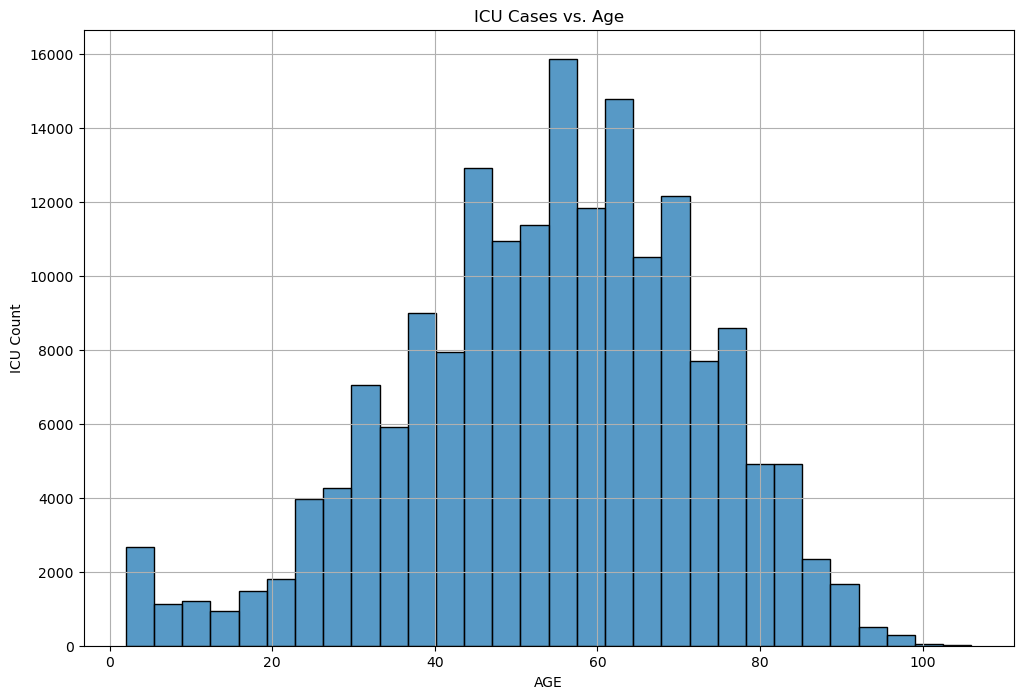

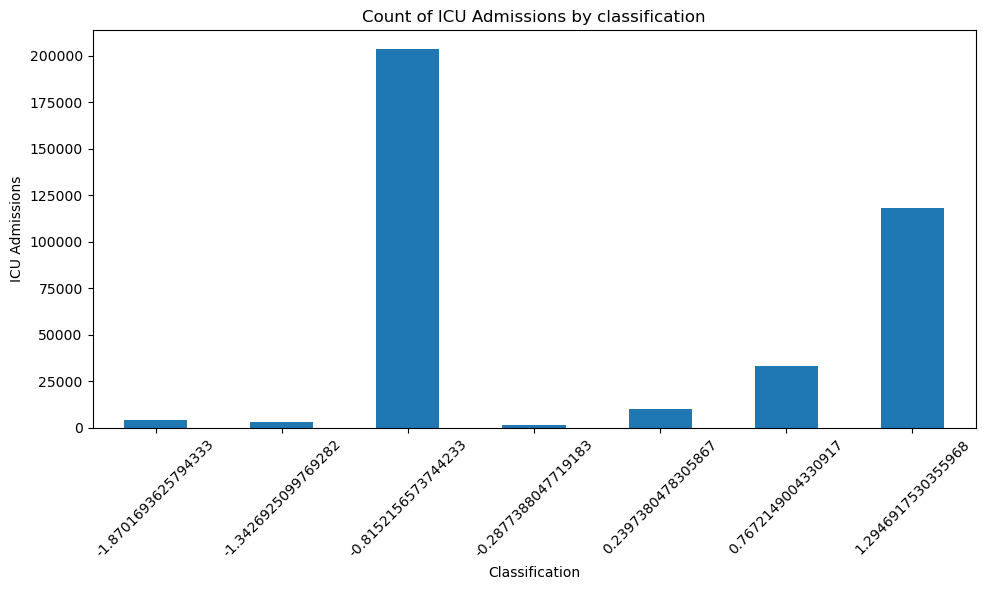

In [ ]:

# Task 2: Data Visualisation
# Plot 1: Distribution of the target variable 'ICU'
plt.figure(figsize=(8, 6))
sns.countplot(data=df_patients, x='ICU')
plt.title('Distribution of ICU Cases')
plt.xlabel('ICU (Indicator)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Plot 2: Count of number of ICU cases against age.
# Get all patients that were admitted to the ICU
ICU_Cases = df_patients[df_patients['ICU'] == 2.0]

plt.figure(figsize=(12, 8))
sns.histplot(data=ICU_Cases, x='AGE', bins = 30, kde = False)
plt.title('ICU Cases vs. Age')
plt.xlabel('AGE')
plt.ylabel('ICU Count')
plt.grid(True)
plt.show()
df_patients.describe()
df_patients.to_csv("cleaned_patients.csv", index=False)

# Plot 3: Count of ICU admissions versus classification
# Classification Final needs to be fixed before we do this
ICU_Counts = df_patients.groupby('CLASIFFICATION_FINAL')['ICU'].sum()

plt.figure(figsize=(10, 6))
ICU_Counts.plot(kind='bar')
plt.title('Count of ICU Admissions by classification')
plt.xlabel('Classification')
plt.ylabel('ICU Admissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 4:
# Show the scatter matrix plot and the correlation matrices